# Analyzing Ticket Data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Import cleaned ticket data
df = pd.read_csv("/Users/jm/dev/acl_spring_24_bulls2/data/bulls2224_tickets_games_clean.csv", 
                 parse_dates = ["event_date", "add_date", "arrival_time", "start_ct"])

/var/folders/3q/d621fwvs43q2f6s93g46njd00000gn/T/ipykernel_51497/2311673374.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/jm/dev/acl_spring_24_bulls2/data/bulls2224_tickets_games_clean.csv",


In [12]:
df.columns

Index(['Unnamed: 0', 'season_name', 'event_date', 'event_weekday',
       'opponent_short', 'parent_ticket_categories', 'add_date',
       'days_before_event', 'purchaser_email', 'attendee_email',
       'original_ticket_holder_flag', 'total_seats', 'seat_location',
       'seat_level', 'arrival_time', 'arrival_time_before_tipoff',
       'attendee_zip_code', 'mobile_scan', 'scan_category', 'G', 'start_ct',
       'Opponent', 'outcome', 'overtime', 'pts', 'pts_all', 'W', 'L', 'Streak',
       'Notes'],
      dtype='object')

In [15]:
grouped_df = df.groupby(['opponent_short', 'event_date', 'parent_ticket_categories'])['total_seats'].sum().reset_index().groupby(['opponent_short', 'parent_ticket_categories']).mean().reset_index()

In [16]:
grouped_df.head()

,opponent_short,parent_ticket_categories,event_date,total_seats
0,76ers,Group,2023-05-07 08:00:00,817.000000
1,76ers,Indivdual: Resale Buyer,2023-05-07 08:00:00,2918.000000
2,76ers,Individual: Primary Buyer,2023-05-07 08:00:00,5054.333333
3,76ers,Season,2023-05-07 08:00:00,6931.000000
4,Blazers,Group,2023-02-04 00:00:00,2043.000000


In [21]:
pivot_df = grouped_df.pivot_table(index = 'opponent_short', columns = 'parent_ticket_categories', values = 'total_seats', aggfunc = 'sum')

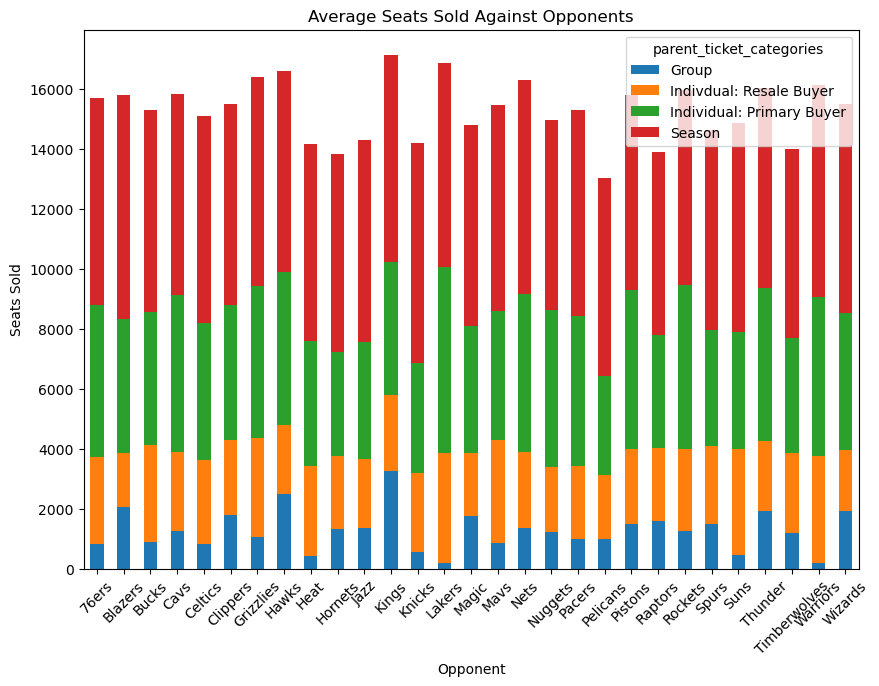

In [22]:
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))
ax.set_title('Average Seats Sold Against Opponents')
ax.set_xlabel('Opponent')
ax.set_ylabel('Seats Sold')
plt.xticks(rotation=45)  # Keep the labels horizontal for better readability
plt.show()

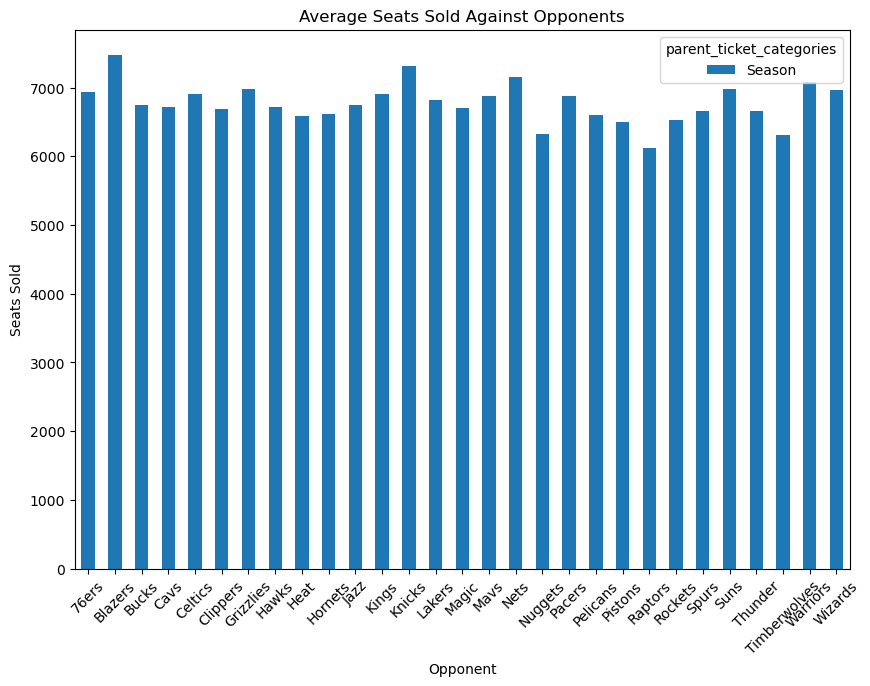

In [24]:
pivot_df2 = grouped_df[grouped_df.parent_ticket_categories == "Season"].pivot_table(index = 'opponent_short', columns = 'parent_ticket_categories', values = 'total_seats', aggfunc = 'sum')

ax = pivot_df2.plot(kind='bar', stacked=True, figsize=(10, 7))
ax.set_title('Average Seats Sold Against Opponents')
ax.set_xlabel('Opponent')
ax.set_ylabel('Seats Sold')
plt.xticks(rotation=45)  # Keep the labels horizontal for better readability
plt.show()